In [1]:
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

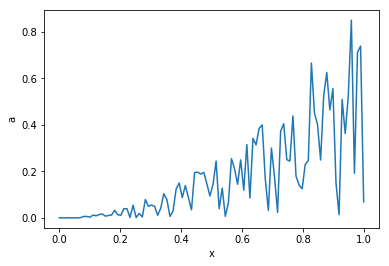

In [3]:
# let's make a simple plot
p.plot('x', 'a')

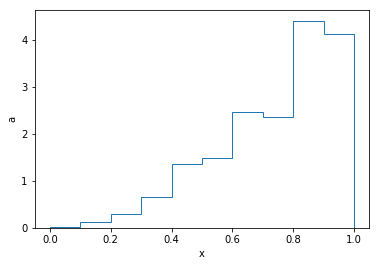

In [4]:
# Generate a histogram function for histograms with weight 'a'
f = p.histogram('a')

# we can evaluate the function on, say 'x', which returns a new object
g = f('x')

# let's plot the result
g.plot()

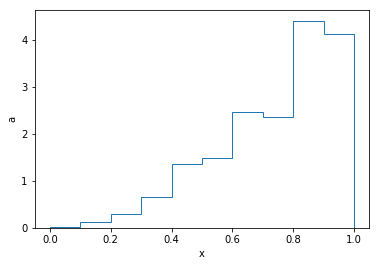

In [5]:
# or in one line
p.histogram('a')('x').plot()

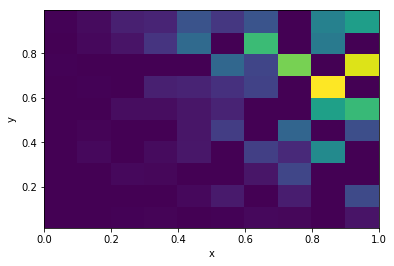

In [6]:
# we can also evaluate the histogram in different dimensions
p.histogram('a')('x', 'y').plot()

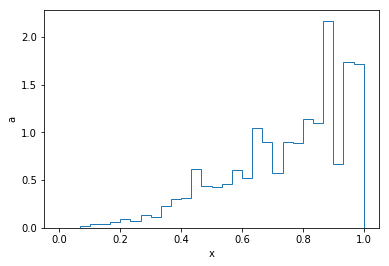

In [7]:
# or the function from before in a different binnig
f(x=30).plot()

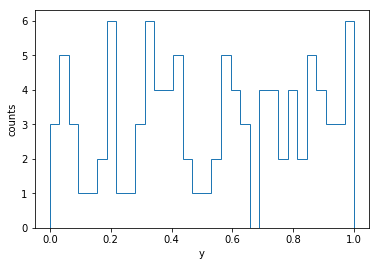

In [8]:
# a histogram with no weights, evaluated in y
p.histogram()(y=np.linspace(0,1,33)).plot()

In [9]:
# the returned object is a GridData type
g = p.histogram('a')(x=20)

In [10]:
# it has a grid defined
g.grid

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))
nbins = 20),)

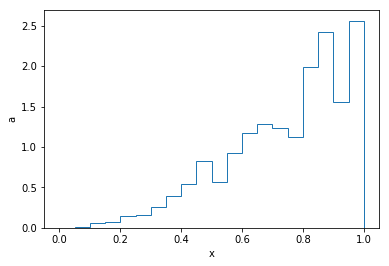

In [11]:
# this evaluates the function from earlier on g
f(g).plot()

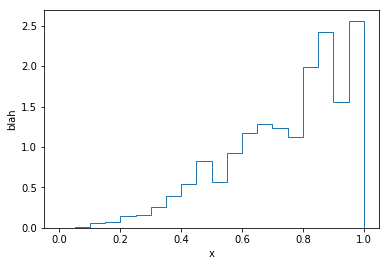

In [12]:
# or assign it a new variable which will automatically evaluate (looks a bit abstract)
g['blah'] = f
g.plot('blah')

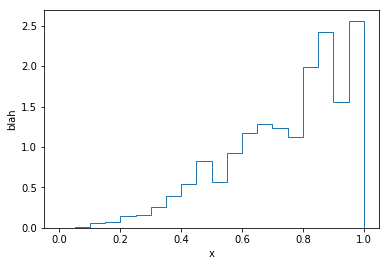

In [13]:
# or again all together
g['blah'] = p.histogram('a')
g.plot('blah')

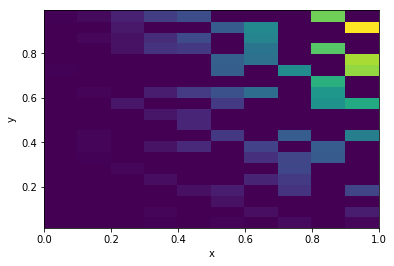

In [14]:
p.histogram('a', method='mean')('x', y=20).plot()

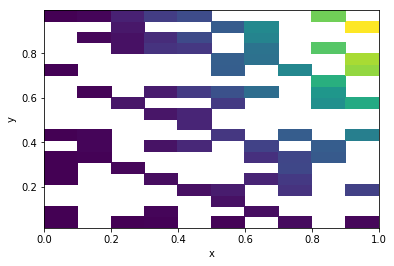

In [15]:
p.histogram('a', function=lambda x : np.percentile(x,33))('x', y=20).plot()

In [16]:
g = pn.GridData('x','y')

In [17]:
g['b'] = p.histogram()

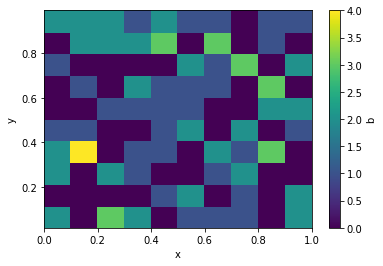

In [18]:
g.plot(cbar=True)

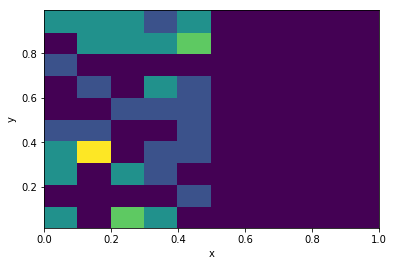

In [19]:
g['c'] = p[p['x'] < 0.5].histogram()
g.plot('c')

In [20]:
grid = pn.grid.Grid(x=[1,np.inf], y=10)

In [21]:
p.histogram('a', method='mean')(grid)

Data({'a': array([[0.06915526, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])})

In [22]:
p[p['x'] < 1].histogram()

<function pynocular.data.Data.histogram.<locals>.fun(*args, **kwargs)>